In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('column_2C_weka.csv')

In [3]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [5]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16e96a58>,
      dtype=object)

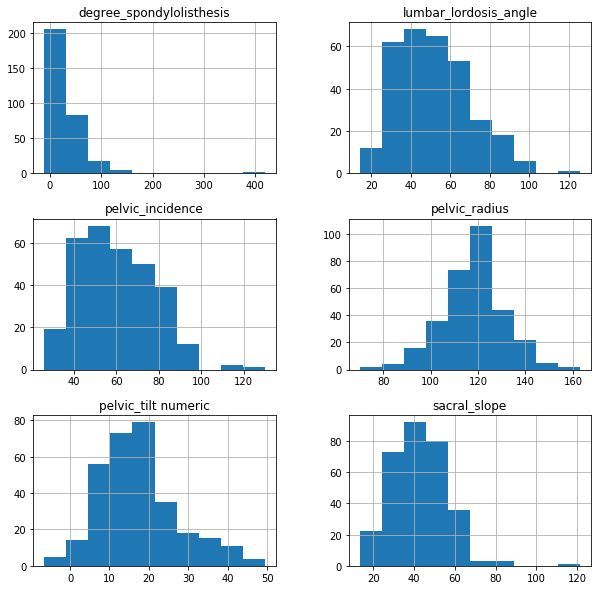

In [6]:
df.hist(figsize=(10,10))

Abnormal    210
Normal      100
Name: class, dtype: int64

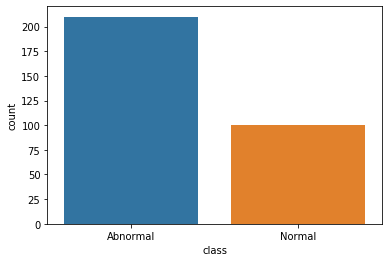

In [7]:
sns.countplot(x='class',data=df)
df['class'].value_counts()

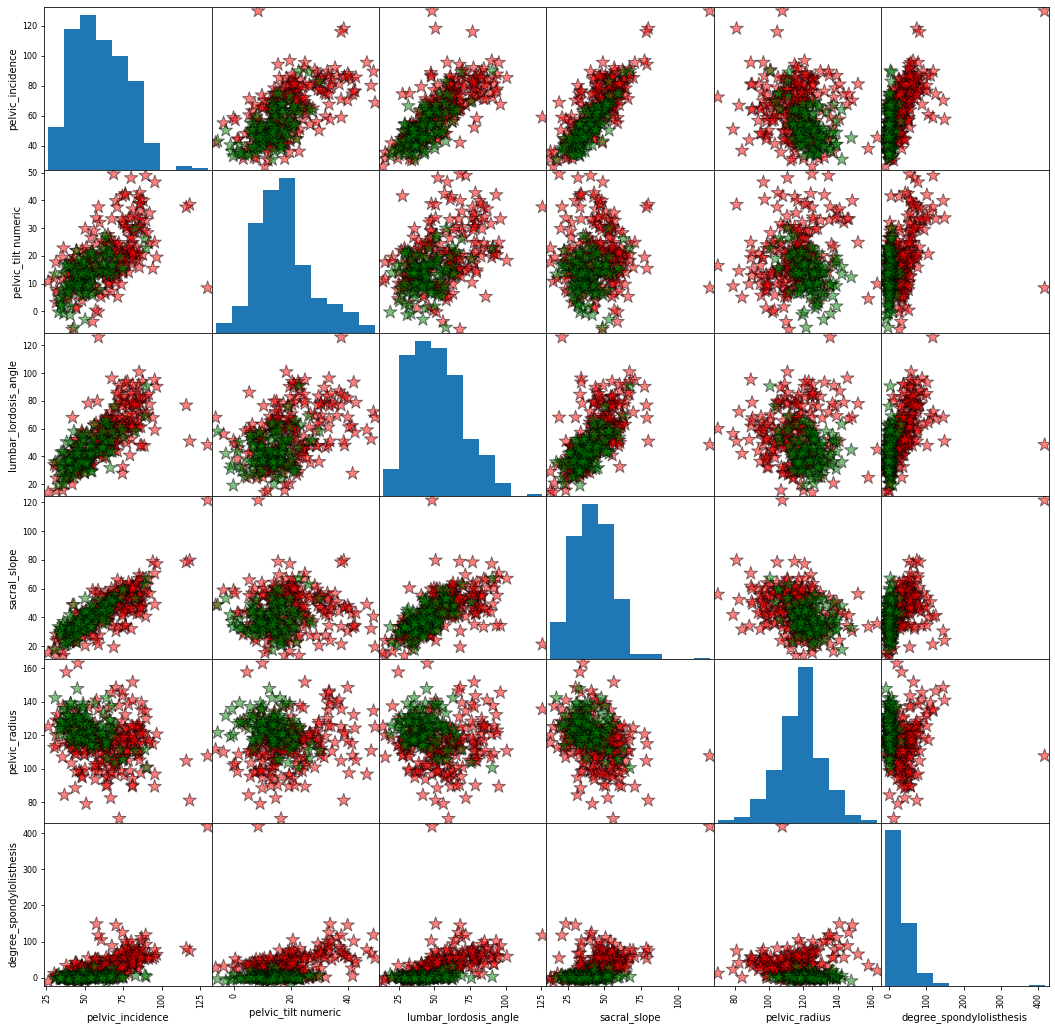

In [8]:
color_list=['red' if i=='Abnormal' else 'green' for i in df.loc[:,'class']]
pd.plotting.scatter_matrix(df.loc[:,df.columns!='class'],c=color_list,marker='*',
                           alpha=0.5,s=200,figsize=(18,18),edgecolor='black');

## K Nearest Neighbor

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn=KNeighborsClassifier(n_neighbors=3)


In [11]:
X,y=df.loc[:,df.columns!='class'],df.loc[:,'class']

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [14]:
X_train.shape,y_train.shape

((217, 6), (217,))

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
x_test.shape

(93, 6)

In [17]:
prediction=knn.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test,prediction)

0.7634408602150538

In [20]:
knn.score(x_test,y_test)

0.7634408602150538

In [21]:
knn2=KNeighborsClassifier(n_neighbors=15)
knn2.fit(X_train,y_train)
knn2.predict(x_test)
knn2.score(x_test,y_test)

0.7311827956989247

In [22]:
train_accuracy=[]
test_accuracy=[]

train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.4)
for i in np.arange(3,20):
    kNN=KNeighborsClassifier(n_neighbors=i)
    kNN.fit(train_x,train_y)
    train_accuracy.append(kNN.score(train_x,train_y))
    test_accuracy.append(kNN.score(test_x,test_y))
    
   
np.mean(train_accuracy)    
    

0.8548387096774194

In [23]:
np.mean(test_accuracy)

0.8847248576850094

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

rf.score(x_test,y_test)

0.7204301075268817

In [26]:
rf.score(X_train,y_train)

0.9769585253456221

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
pred=lr.predict(x_test)

In [30]:
accuracy_score(pred,y_test)

0.6989247311827957

In [31]:
lr.score(X_train,y_train)

0.8755760368663594

In [32]:
lr.score(x_test,y_test)

0.6989247311827957

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cv_results=cross_val_score(lr,X,y,cv=8)
cv_results

array([0.45      , 0.65      , 0.74358974, 0.92307692, 0.86842105,
       0.97368421, 0.86842105, 0.86842105])

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
pred=lr.predict(x_test)
cm=confusion_matrix(y_test,pred)

In [37]:
clss=classification_report(y_test,pred)

In [38]:
print('confusion matrix:',cm)
print('classification report":',clss)

confusion matrix: [[53 17]
 [11 12]]
classification report":               precision    recall  f1-score   support

    Abnormal       0.83      0.76      0.79        70
      Normal       0.41      0.52      0.46        23

    accuracy                           0.70        93
   macro avg       0.62      0.64      0.63        93
weighted avg       0.73      0.70      0.71        93



In [39]:
cv_results.mean()

0.7932017543859649

In [40]:
from sklearn.metrics import roc_curve

In [41]:
df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [42]:
X,y=df.drop('class',axis=1),df['class'].map({'Abnormal':0,'Normal':1})

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=13)
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
pred_prob=logreg.predict_proba(X_test)[:,1]


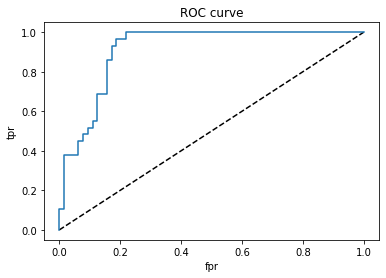

In [44]:
fpr,tpr,t=roc_curve(y_test,pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

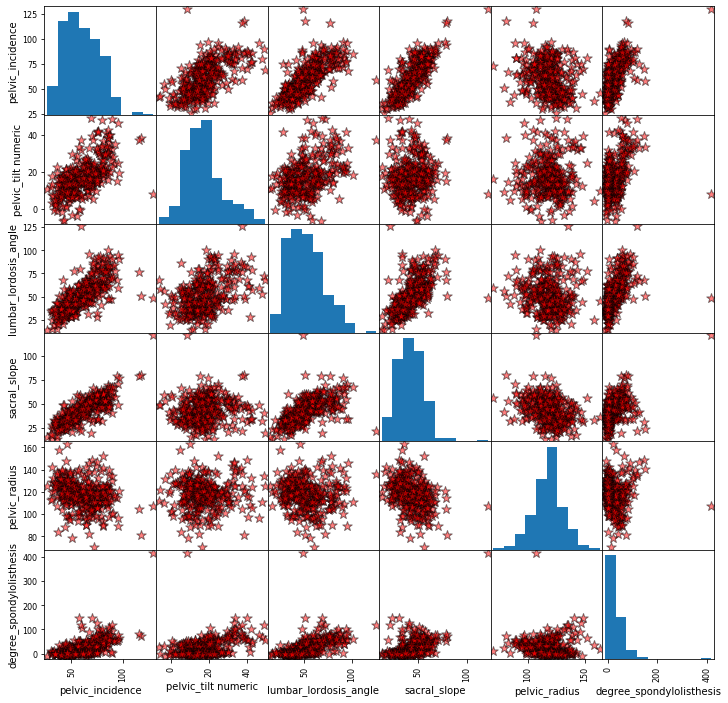

In [45]:
pd.plotting.scatter_matrix(df.loc[:,df.columns != 'class'],alpha=0.5,s=100,
                           figsize=(12,12),marker='*',edgecolor='black',c='red');

## Linear Regression

In [46]:
x=df.loc[:,'pelvic_incidence']
y=df.loc[:,'sacral_slope']

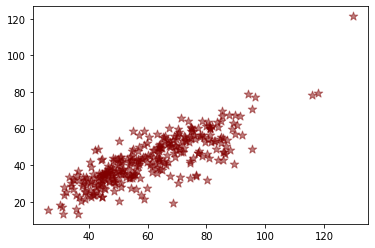

In [47]:
plt.scatter(x=x,y=y,c='maroon',alpha=0.5,s=80,marker='*');

In [48]:
from sklearn.linear_model import LinearRegression
lrr=LinearRegression()
xtrain,xtest,ytrain,ytest=train_test_split(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1),
                                           test_size=0.3,random_state=12)
lrr.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
lrr.score(xtrain,ytrain)

0.6659563591699555

In [50]:
lrr.score(xtest,ytest)

0.6549506465266286

In [51]:
cvresults=cross_val_score(lrr,np.array(x).reshape(-1,1),np.array(y).reshape(-1,1),cv=5)

In [52]:
cvresults

array([0.02827495, 0.50977686, 0.36780416, 0.59740705, 0.55938911])

## Ridge and Lasso

In [53]:
from sklearn.linear_model import Ridge, Lasso

In [54]:
rg=Ridge(alpha=10)
rg.fit(xtrain,ytrain)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [55]:
rg.score(xtrain,ytrain)


0.6659563439282403

In [56]:
pred=rg.predict(xtest)


In [57]:
rg.score(xtest,ytest)

0.654950436463829

In [58]:
train=[]
test=[]

for i in [0.1,0.5,0.01,1,0.8,10,0.001]:
    rg=Ridge(alpha=i)
    rg.fit(xtrain,ytrain)
    train.append(rg.score(xtrain,ytrain))
    test.append(rg.score(xtest,ytest))
print(train)
print(test)

[0.6659563591684309, 0.6659563591318403, 0.6659563591699402, 0.6659563590174968, 0.6659563590723814, 0.6659563439282403, 0.6659563591699553]
[0.6549506445746611, 0.6549506367367494, 0.6549506463315672, 0.6549506268717695, 0.6549506308267734, 0.654950436463829, 0.6549506465071239]


In [59]:
np.mean(train)

0.6659563569511836

In [60]:
np.mean(test)

0.6549506097589248

In [61]:
rg.coef_

array([[0.63401828]])

In [62]:
ls=Lasso(alpha=0.5)
ls.fit(xtrain,ytrain)


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
ls.score(xtrain,ytrain)

0.6659518941731286

In [64]:
x=df.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius',
            'degree_spondylolisthesis']]
y=df.loc[:,'sacral_slope']


In [65]:
x.shape,x.columns,x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 5 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
dtypes: float64(5)
memory usage: 12.2 KB


((310, 5),
 Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
        'pelvic_radius', 'degree_spondylolisthesis'],
       dtype='object'),
 None)

In [66]:
y.shape
y.head()

0    40.475232
1    28.995960
2    46.613539
3    44.644130
4    40.060784
Name: sacral_slope, dtype: float64

In [67]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.3)

In [68]:
lss=Lasso(alpha=0.1)
lss.fit(trainx,trainy)




Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
lss.score(trainx,trainy)

0.9999979681263895

In [70]:
lss.score(testx,testy)

0.9999964352692579

In [71]:
trainresults=[]
testresults=[]
for i in [0.1,0.5,0.8,1,0.01,0.001,10]:
    lss=Lasso(alpha=i)
    lss.fit(trainx,trainy)
    trainresults.append(lss.score(trainx,trainy))
    testresults.append(lss.score(testx,testy))
print(trainresults)
print(testresults)

[0.9999979681263895, 0.9999516611642097, 0.9998772663992548, 0.9998086577788801, 0.9999999491805635, 0.9999999821293635, 0.9809532409723479]
[0.9999964352692579, 0.9999157277318795, 0.9997862596285283, 0.9996668758128174, 0.9999999011026385, 0.9999999658646977, 0.9668599037769111]


In [72]:
lss.coef_

array([ 0.86253128, -0.75436227,  0.        , -0.        ,  0.0150455 ])

## Parameter tuning

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [76]:
x=df.loc[:,df.columns !='class']
y=df['class'].map({'Abnormal':0,'Normal':1})
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [81]:
steps=[('scalar',StandardScaler()),('SVM',SVC())]
pipeline=Pipeline(steps)
parameters={'SVM__C':[1,10,100],'SVM__gamma':[0.1,0.01]}
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=12)
cv=GridSearchCV(pipeline,parameters,cv=3)
cv.fit(xtrain,ytrain)
pred=cv.predict(xtest)



/Users/shivaganesh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [82]:
print('acuracy score:',cv.score(xtest,ytest))
print('best parameters',cv.best_params_)

acuracy score: 0.8279569892473119
best parameters {'SVM__C': 10, 'SVM__gamma': 0.1}


## unsupervised learning

### Kmeans clustering

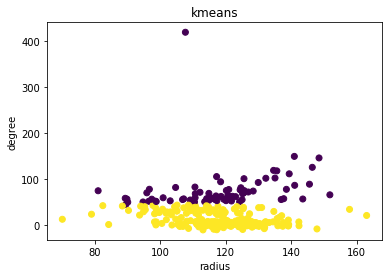

In [83]:
from sklearn.cluster import KMeans

data=df.loc[:,['pelvic_radius','degree_spondylolisthesis']]

km=KMeans(n_clusters=2)
km.fit(data)

labels=km.predict(data)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c=labels)
plt.xlabel('radius')
plt.ylabel('degree')
plt.title('kmeans')
plt.show()

In [84]:
frame=pd.DataFrame({'labels':labels,'class':df['class']})
pd.crosstab(frame['labels'],frame['class'])

class,Abnormal,Normal
labels,,
0,72,0
1,138,100


In [86]:
data.head()

,pelvic_radius,degree_spondylolisthesis
0,98.672917,-0.254400
1,114.405425,4.564259
2,105.985135,-3.530317
3,101.868495,11.211523
4,108.168725,7.918501


In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [88]:
scalar=StandardScaler()
kmeans=KMeans(n_clusters=2)
pipe=make_pipeline(scalar,kmeans)
pipe.fit(data)
labels=pipe.predict(data)
df2=pd.DataFrame({'labels':labels,'class':df['class']})
pd.crosstab(df2['labels'],df2['class'])

class,Abnormal,Normal
labels,,
0,87,98
1,123,2
